# **Rishabh Chavan**

# **Data Science Intern @Bharat Intern**

# **Task 2: Titanic Classification**

## Import Modules 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
df = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Documents\\titanic.csv')
os.chdir("C:\\Users\\LENOVO\\OneDrive\\Documents")

In [3]:
train = pd.read_csv('titanic.csv')

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

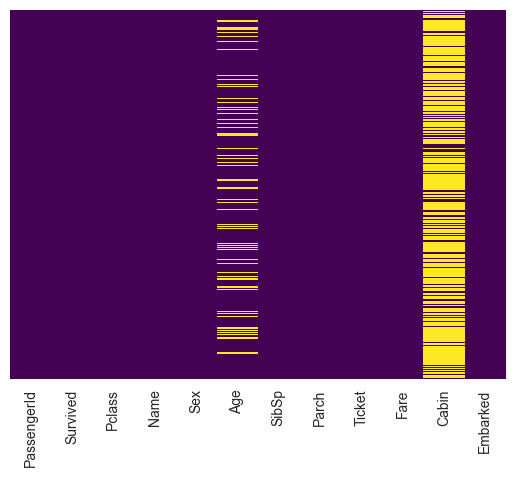

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

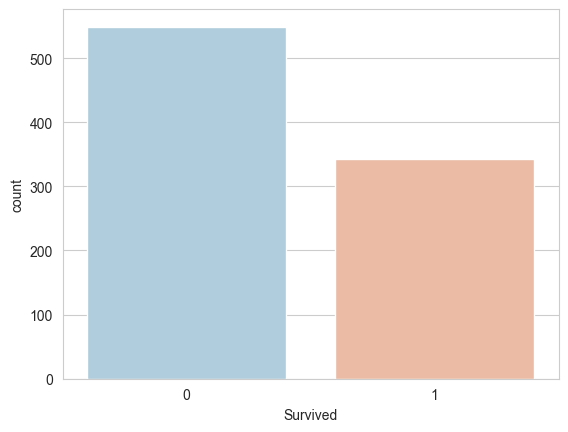

In [7]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

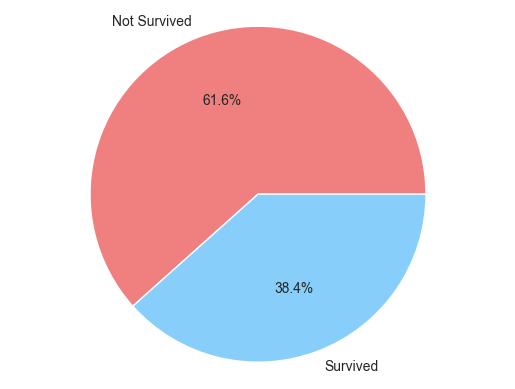

In [8]:
survived_counts = train['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

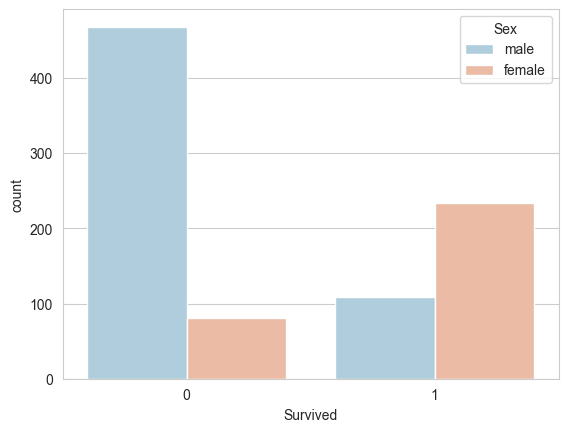

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

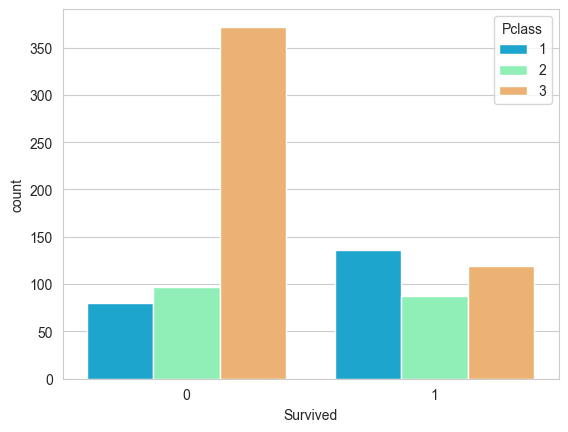

In [10]:

sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

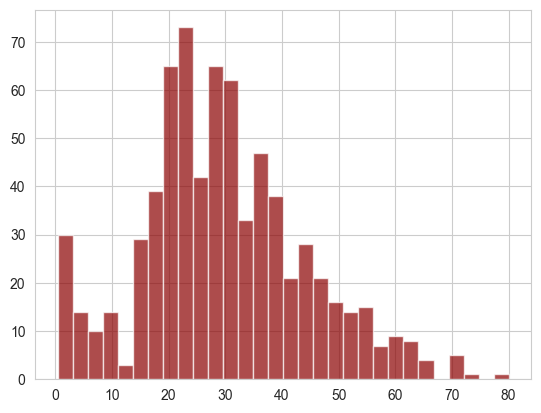

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

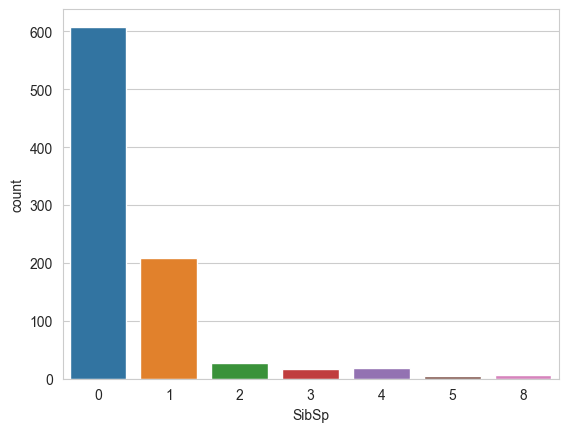

In [12]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

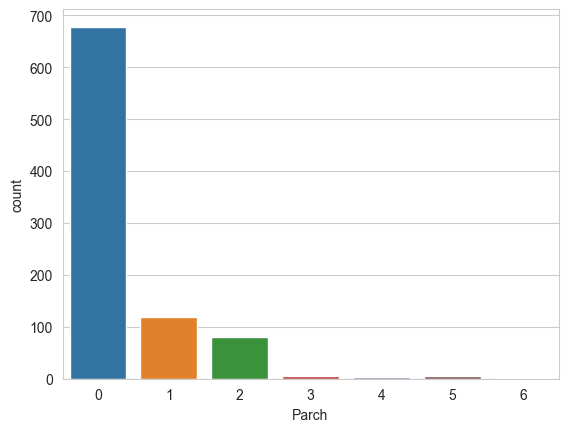

In [13]:
sns.countplot(x='Parch',data=train)

<Axes: >

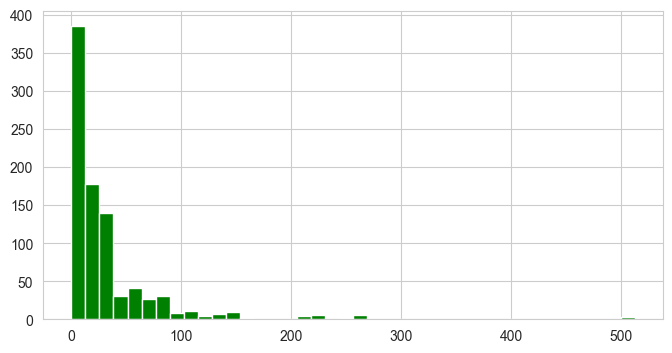

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

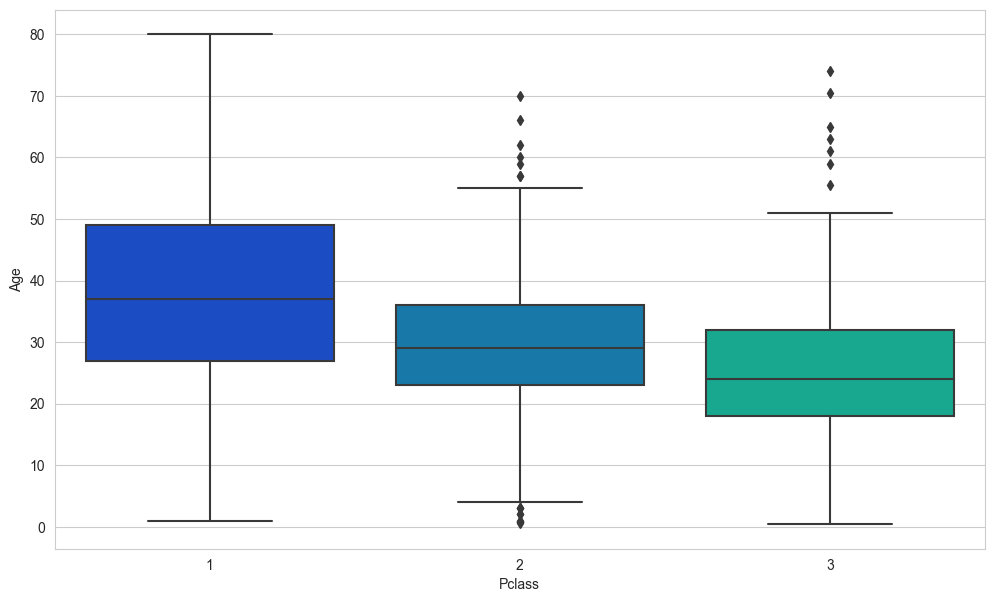

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
train['Embarked'] = train['Embarked'].fillna('S')

<Axes: >

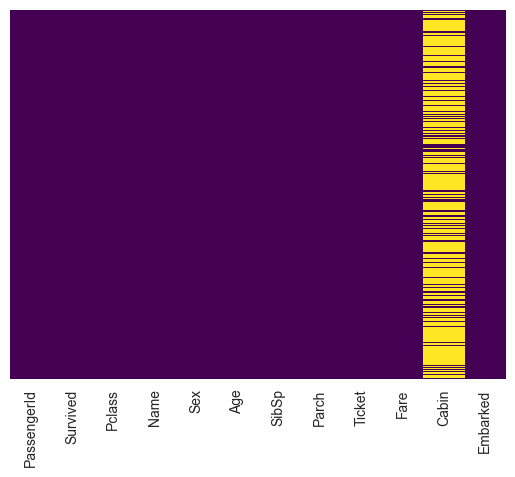

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.dropna(inplace=True)

### Converting Categorical Features

In [23]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Train Test Split  

In [28]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),train['Survived'], test_size=0.10, random_state=101)

### Training and Predicting

In [29]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [30]:
predictions = logmodel.predict(x_test)
x_test.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,True,False,True
700,701,1,18.0,1,0,227.525,False,False,False
748,749,1,19.0,1,0,53.100,True,False,True
751,752,3,6.0,0,1,12.475,True,False,True
481,482,2,29.0,0,0,0.000,True,False,True


In [31]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

### Evaluation

In [32]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [16 23]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



### Decision Tree Classification

In [34]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
dt_pred = dt_model.predict(x_test)

In [36]:
print(confusion_matrix(y_test,dt_pred))

[[43  8]
 [14 25]]


In [37]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80        51
           1       0.76      0.64      0.69        39

    accuracy                           0.76        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.76      0.76      0.75        90



### Random Forest Classification 

In [38]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [39]:
rf_pre=rf.predict(x_test)

In [40]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [14 25]]


In [41]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



### XGBoosts Classifier  

In [42]:
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
xg_pred = xgboost.predict(x_test)

In [44]:
print(confusion_matrix(y_test,xg_pred))


[[45  6]
 [16 23]]


In [45]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        51
           1       0.79      0.59      0.68        39

    accuracy                           0.76        90
   macro avg       0.77      0.74      0.74        90
weighted avg       0.76      0.76      0.75        90



### Scaling 

In [46]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### ANN 

In [47]:
ann  = Sequential()
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu', input_dim=9))
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
ann.fit(x_train, y_train, batch_size=32, epochs=100, verbose=0)

In [49]:
ann_pred = ann.predict(x_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 6ms/step
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


In [50]:
print(confusion_matrix(y_test,ann_pred))

[[49  2]
 [13 26]]


In [51]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90



### Test Dataset

In [52]:
test = pd.read_csv('titanic.csv')

<Axes: >

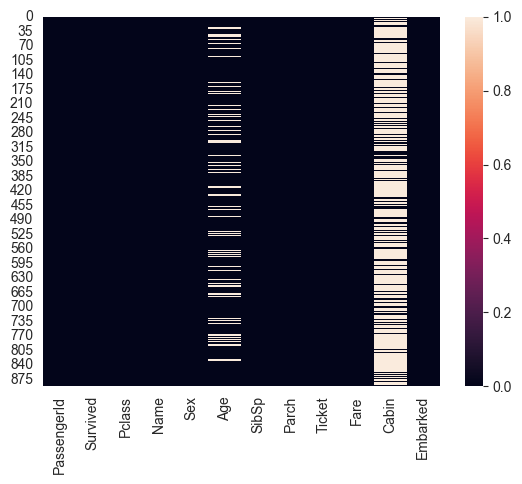

In [53]:
sns.heatmap(test.isnull())

In [54]:
test.drop('Cabin',axis=1,inplace=True)

In [55]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [57]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [59]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)


In [60]:
columns_to_drop = ['Sex', 'Embarked', 'Name', 'Ticket']
for column in columns_to_drop:
    if column in test.columns:
        test.drop(column, axis=1, inplace=True)


In [61]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [62]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [64]:
x_train = sc.fit_transform(train.drop(['Survived'], axis=1))
train_labels = train['Survived']
train = train.drop('Survived', axis=1)

x_test = sc.transform(test.drop(['Survived'], axis=1))
test_labels = test['Survived']
test = test.drop('Survived', axis=1)



In [65]:
ann.fit(x_train, train_labels, epochs=300, verbose=0)

In [66]:
test_predictions = ann.predict(x_test)
test_predictions = [1 if y >= 0.5 else 0 for y in test_predictions]


28/28 [==============================] - 0s 3ms/step


In [67]:
test_pred = pd.DataFrame(test_predictions, columns=['Survived'])

In [68]:
new_test = pd.concat([test, test_pred['Survived']], axis=1, join='inner')

In [69]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,1,3,22.0,1,0,7.2500,True,False,True,0
1,2,1,38.0,1,0,71.2833,False,False,False,1
2,3,3,26.0,0,0,7.9250,False,False,True,0
3,4,1,35.0,1,0,53.1000,False,False,True,1
4,5,3,35.0,0,0,8.0500,True,False,True,0


In [70]:
df= new_test[['PassengerId' ,'Survived']]

In [71]:
df.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


In [72]:
df.to_csv('predictions.csv' , index=False)

In [73]:
import os
print(os.getcwd())

C:\Users\LENOVO\OneDrive\Documents


In [74]:
df.to_csv('C:/Users/LENOVO/OneDrive/Documents/predictions.csv', index=False)